In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
zoo_data = pd.read_csv('/content/Zoo.csv')




In [2]:
# Display the first few rows of the dataframe
print(zoo_data.head())



  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [3]:
# Summary statistics
print(zoo_data.describe())



             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [4]:
# Check for any missing values
print(zoo_data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [5]:
# Separate features (X) and target variable (y)
X = zoo_data.drop(columns=['animal name', 'type'])
y = zoo_data['type']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for KNN, but can improve performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [7]:
# Evaluate the model on the testing data
accuracy = knn_classifier.score(X_test_scaled, y_test)
print("Accuracy of the KNN classifier:", accuracy)


Accuracy of the KNN classifier: 0.9523809523809523


In [8]:
# Make predictions on new data
new_data = [[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 4, 1, 0, 1]]  # Example data for prediction
predicted_class = knn_classifier.predict(scaler.transform(new_data))
print("Predicted class for the new data:", predicted_class)


Predicted class for the new data: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


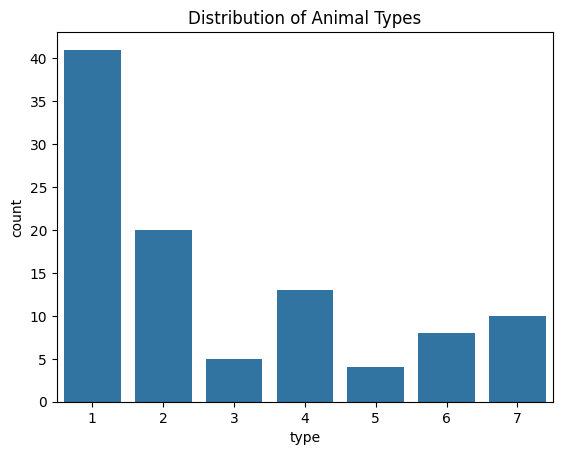

In [9]:
# Check the distribution of the target variable 'type'
sns.countplot(x='type', data=zoo_data)
plt.title('Distribution of Animal Types')
plt.show()

<ipython-input-10-0c35f800049b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = zoo_data.corr()


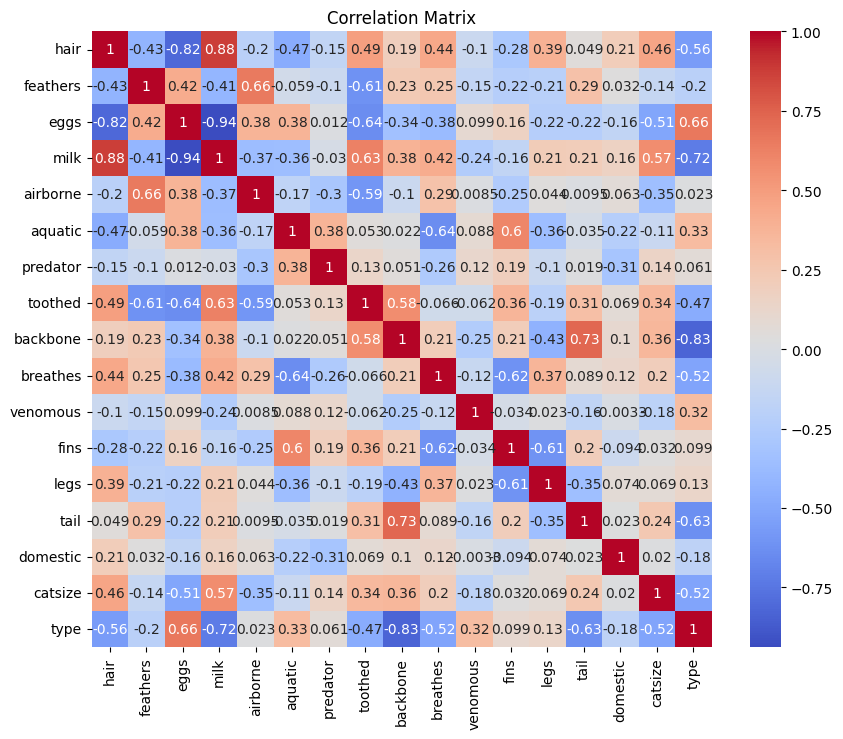

In [10]:
# Check for correlations between features
corr = zoo_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Experiment with different values of k
k_values = [3, 5, 7, 9, 11]  # Define a list of values for k

# Initialize an empty list to store the accuracies for different k values
accuracies = []

# Iterate over each value of k and train a KNN model
for k in k_values:
    # Initialize the KNN classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(X_train_scaled, y_train)

    # Evaluate the model on the testing data and store the accuracy
    accuracy = knn_classifier.score(X_test_scaled, y_test)
    accuracies.append(accuracy)

    print("Accuracy of KNN classifier with k =", k, ":", accuracy)




Accuracy of KNN classifier with k = 3 : 1.0
Accuracy of KNN classifier with k = 5 : 0.9523809523809523
Accuracy of KNN classifier with k = 7 : 0.9523809523809523
Accuracy of KNN classifier with k = 9 : 0.9047619047619048
Accuracy of KNN classifier with k = 11 : 0.8571428571428571


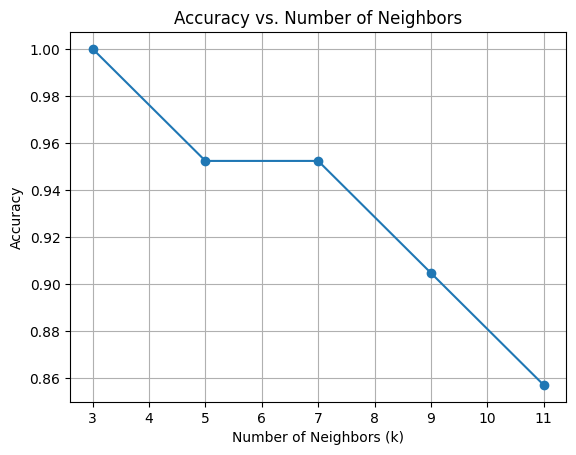

In [12]:
# Plot the accuracies for different values of k
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()